In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import datetime as dt
import re
import matplotlib.pyplot as plt
from subprocess import check_output
from langdetect import detect

In [2]:
pwd = os.getcwd()
city = 'boston'
listings = pd.read_csv(pwd + '/' + city +'/listings_2015.csv', encoding = 'utf8')
reviews_raw = pd.read_csv(pwd + '/' + city +'/reviews.csv')

In [3]:
reviews_raw=reviews_raw.rename(columns = {'id':'id1'})

In [4]:
reviews_raw = reviews_raw.rename(columns = {'listing_id':'id'})
reviews_raw.head()

,id,id1,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [5]:
from langdetect import detect 
#detect('Belle chambre dans une charmante maison bien équipée dans une rue tranquille proche métro et vélos lib. Bon accueil de notre hôte très arrangeante pour notre arrivée tardive. On a passé un très bon séjour à Boston. Je recommande cette adresse.')
def detect_lang (comments) :
    lang = 'unknown'
    try:
        lang =  detect(comments)
    except:
        print(comments)
    return lang

reviews_raw['lang'] = reviews_raw['comments'].apply(lambda x: detect_lang(x))

nan
nan
-
nan
nan
nan
nan
nan
nan
nan
nan
.
nan
.
nan
nan


nan
nan
nan
.
nan
nan
nan
nan
nan
...
nan
nan
nan
nan
nan
nan
.
nan
nan
.
nan
nan
nan
.
&
nan
nan
. 
nan
nan
nan
nan
nan
nan
nan
.
nan
nan
nan
nan
10/10
nan
:)
.
nan
nan
nan
:-)
nan
nan
nan


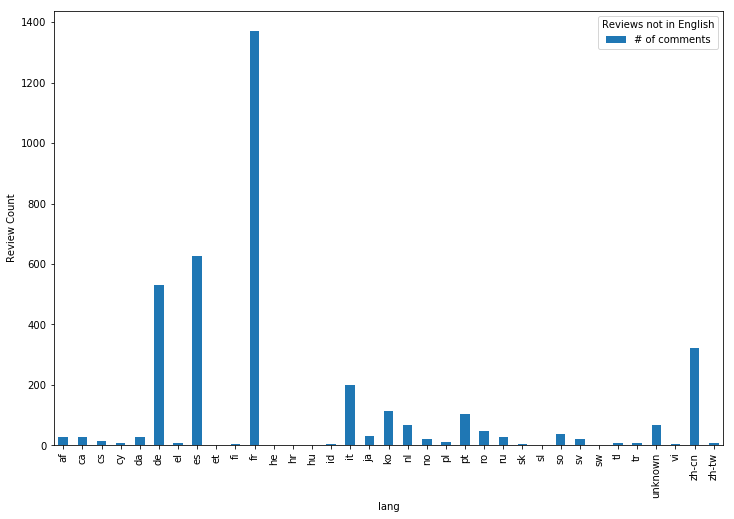

In [6]:
reviews_raw[reviews_raw['lang']!='en'].pivot_table(values='id', columns='lang', aggfunc=len).plot(kind='bar')
plt.ylabel('Review Count')
legend=plt.legend()
legend.get_texts()[0].set_text('# of comments')
legend.set_title('Reviews not in English')
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig("comment_lang_"+ city + ".png")
plt.show()

In [7]:
reviews_raw['comments']=reviews_raw['comments'].astype(str)
reviews_en = reviews_raw[reviews_raw['lang']=='en']
reviews_en.shape

(64511, 7)

In [9]:
## Map rating into three categories, -1=bad, 0=good, 1=excellent
def score_range(listings):
    if listings['review_scores_rating'] <= 78:
        val = -1  
    elif listings['review_scores_rating'] < 100:
        val = 0
    else:
        val = 1
    return val

In [10]:
listings['review_score_range']=listings.apply(score_range,axis=1)
listings[['review_score_range','review_scores_rating']].dtypes

review_score_range        int64
review_scores_rating    float64
dtype: object

In [11]:
listings['review_scores_value'] = listings['review_scores_value'].astype(int)

In [12]:
listings['review_score_range'] = listings['review_score_range'].astype(int)

In [13]:
# listings['review_score_range']

In [14]:
df=pd.merge(listings, reviews_raw, on='id', how='inner')
df.shape

(52127, 82)

In [15]:
from bs4 import BeautifulSoup 
import re
import nltk

In [16]:
#nltk.download('punkt')

In [17]:
#nltk.download('stopwords', '/Users/../nltk_data')
#nltk.download("wordnet")

In [18]:
from nltk.corpus import stopwords # Import the stop word list

In [19]:
stopwords_ = stopwords.words("english")
stopwords_ = ['\r\n','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'so', 'too', 'very', 's', 't', 'can', 'will', 'don', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ma' ,'com']
stopwords_.extend(['\r\n','\n'])
#stopwords_=[]
print(stopwords_)

['\r\n', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'so', 'too', 'very', 's', 't', 'can', 'will', 'don', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ma', 'com', '\r\n',

In [20]:
from nltk.corpus import wordnet
class AntonymReplacer(object):
    def replace(self, word, pos=None):
        antonyms = set()
        for syn in wordnet.synsets(word, pos=pos):
              for lemma in syn.lemmas():
                    for antonym in lemma.antonyms():
                        antonyms.add(antonym.name())
        if len(antonyms) == 1:
            return antonyms.pop()
        else:
            return None

    def replace_negations(self, sent):
        i, l = 0, len(sent)
        words = []
        while i < l:
            word = sent[i]
            if word == 'not' and i+1 < l:
                ant = self.replace(sent[i+1])
                if ant:
                    words.append(ant)
                    i += 2
                    continue
            words.append(word)
            i += 1
        return words
replacer_syn = AntonymReplacer()
print(replacer_syn.replace('good'))
print(replacer_syn.replace('uglify'))
sent = ["let's", 'not', 'uglify', 'our', 'code']
print(replacer_syn.replace_negations(sent))

None
beautify
["let's", 'beautify', 'our', 'code']


In [21]:
import re
from nltk.corpus import wordnet

class RepeatReplacer(object):
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'

    def replace(self, word):
        if len(wordnet.synsets(word)) > 0:
            return word
        repl_word = self.repeat_regexp.sub(self.repl, word)

        if repl_word != word:
            return self.replace(repl_word)
        else:
            return repl_word
replacer = RepeatReplacer()
from nltk.tokenize import word_tokenize

replacement_patterns = [
  (r'won\'t', 'will not'),
  (r'can\'t', 'cannot'),
  (r'i\'m', 'i am'),
  (r'ain\'t', 'is not'),
  (r'(\w+)\'ll', '\g<1> will'),
  (r'(\w+)n\'t', '\g<1> not'),
  (r'(\w+)\'ve', '\g<1> have'),
  (r'(\w+)\'s', '\g<1> is'),
  (r'(\w+)\'re', '\g<1> are'),
  (r'(\w+)\'d', '\g<1> would')
]

class RegexpReplacer(object):
    def __init__(self, patterns=replacement_patterns):
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in 
          patterns]

    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            s = re.sub(pattern, repl, s)
        return s

replacer_re = RegexpReplacer()

def review_to_words( raw_review, remove_stopwords=False  ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 0. Get emotion icons
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', raw_review) 
    # 1. Remove HTML
    #review_text = BeautifulSoup(raw_review, "lxml").get_text() 
    words = raw_review.lower()  
    words = word_tokenize(replacer_re.replace(words))


    words = re.sub("([^a-zA-Z])", " ", " ".join( words ))  
    words = [replacer.replace(w) for w in words.split()] 
    words = word_tokenize(replacer_re.replace(" ".join( words )))
    #
    # 2. Remove non-letters        
    #
    # 3. Convert to lower case, split into individual words
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
   
    #words = replacer_syn.replace_negations(letters_only)
    #words = [w for w in words]
    # 
    # 5. Remove stop words
    if remove_stopwords:
        stops = set(stopwords_)   
        words = [w for w in words if not w in stops]    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    #return( " ".join( words ))
    return( " ".join( words )+ " "+ " ".join(emoticons))

In [22]:
# print(review_to_words(":)" + df["description"], True))
# # print(replacer.replace("good"))
# print(review_to_words("!!! doesn't !!!", True))
# print(review_to_words("!!!doesn't!!!", True))
# print(review_to_words("!!!good!!!", True))
# print(review_to_words(":)not good", True))

In [23]:
clean_review = review_to_words(df["comments"][28], remove_stopwords = True)
print(clean_review)

phil wonderful host house located charming suburb easy access restaurants public transport enjoyed stay gladly stay again boston 


In [24]:
X_train = df.loc[:37999, 'comments'].values
y_train = df.loc[:37999, 'review_score_range'].values

X_test  = df.loc[38000:, 'comments'].values
y_test  = df.loc[38000:, 'review_score_range'].values

print(X_train.shape)
print(X_test.shape)

(38000,)
(14127,)


In [25]:
print(df[df.review_score_range==-1]['comments'].iloc[1:15].values)

[ 'I stay two nights there, the severals hosts are welcoming. But the dirt of the place make me very unconfortable.'
 "My stay at Kaitlin's was great. she made me feel super confortable and like at home right away. the bedroom is very confortable and I will definitely come back there ! Thank you soooo much !"
 'We did not have many opportunities to get to know our hosts.  They were away on vacation when we arrived, however, we were made aware of this ahead of time.  They arrived home on the Monday (we arrived on Saturday).  \r\nA deciding factor for us booking here was the 6 min walk to the subway on the Orange line. However, the subway was closed for renovations on weekends in August and this information was not relayed to us.  We had to find out on our own that we needed to catch a shuttle bus to Ruggles station (this added about 20 minutes to our travels each morning and night).  \r\nThis home is supposed to have air conditioning and it definitely did not.  We were on the 3rd level 

In [26]:
# Get the number of reviews based on the dataframe column size
num_reviews = X_train.size
# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in (range( num_reviews )):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews.append( review_to_words(X_train[i], True) )

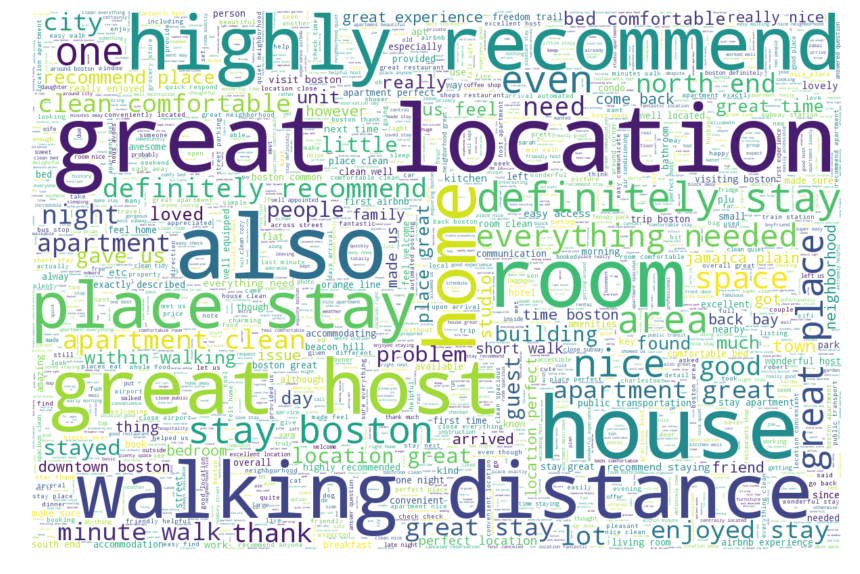

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=1200, height=800, background_color="white", max_words=2000).generate(' '.join(clean_train_reviews))

# lower max_font_size
plt.figure()
plt.imshow(wordcloud, cmap=plt.cm.autumn, interpolation="bilinear")
plt.axis("off")
fig = plt.gcf()
plt.tight_layout(pad=0)
fig.set_size_inches(12, 8)
fig.savefig("comment_word_cloud_"+ city + ".png")
plt.show()

In [28]:
print("Creating the bag of words...\n") 
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize

def tokenizer_porter(text):
    return [porter.stem(t) for t in word_tokenize(text)]

def tokenizer(text):
    return text.split()
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  

from nltk.stem import WordNetLemmatizer 
from nltk import word_tokenize

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
    
vectorizer = TfidfVectorizer(
                             strip_accents = None,
                             lowercase = True, 
                             ngram_range=(1,3), 
                             norm='l2', 
                             stop_words = stopwords_, 
                             tokenizer= LemmaTokenizer(), #tokenizer_porter
                             use_idf=True,
                             min_df = 3,
                             analyzer = 'word',
                             max_features = 2 ** 21
                            )
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [29]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print(len(vocab))
print(" Top 100")
for idx, word in enumerate(vocab[:100]):
    print(idx, word)

125948
 Top 100
0 (
1 )
2 ) :
3 ) : )
4 ) : -
5 ) ;
6 ) ; )
7 ) ; -
8 -
9 - (
10 - )
11 - ) :
12 - ) ;
13 -d
14 :
15 : (
16 : )
17 : ) :
18 : ) ;
19 : -
20 : - )
21 : -d
22 : :
23 : p
24 ;
25 ; )
26 ; ) :
27 ; -
28 ; - )
29 =
30 = )
31 =d
32 ab
33 ab b
34 aback
35 abastanza
36 abend
37 abends
38 aber
39 aber ale
40 aber auch
41 aber auf
42 aber da
43 aber die
44 aber e
45 aber f
46 aber f r
47 aber keine
48 aber nicht
49 aber sehr
50 abgeholt
51 abiamo
52 abiamo sogiornato
53 abiamo sogiornato per
54 abiamo trovato
55 abide
56 abierta
57 ability
58 ability walk
59 able
60 able access
61 able access apartment
62 able accommodate
63 able accommodate arrival
64 able accommodate early
65 able accommodate last
66 able accommodate u
67 able actually
68 able answer
69 able answer question
70 able arrange
71 able arrive
72 able avec
73 able book
74 able breakfast
75 able bring
76 able catch
77 able chat
78 able check
79 able check early
80 able chez
81 able clean
82 able climb
83 able climb st

In [30]:
# Get the number of reviews based on the dataframe column size
num_reviews = X_test.size
# Initialize an empty list to hold the clean reviews
clean_test_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in (range( num_reviews )):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_test_reviews.append( review_to_words( X_test[i], True ) )

test_data_features = vectorizer.transform(clean_test_reviews)

In [31]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier
    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble
    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).
    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.
    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.
        y : array-like, shape = [n_samples]
            Vector of target class labels.
        Returns
        -------
        self : object
        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.
        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.
        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

In [32]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier


names = [
         #"Perceptron",
         "LogisticRegression",
         "Linear SVM", 
         #"Decision Tree", 
         #"Random Forest", 
         #"RBF SVM",      
         #"Neural Net", 
         "Naive Bayes",
         "Linear classifiers with SGD"#,
         #"vote"
        ] 

classifiers = [
    #Perceptron(),
    LogisticRegression(C=10000),
    LinearSVC(C=1), # dataset too large, use one-vs-rest svm without kernel
    #DecisionTreeClassifier(max_depth=10),
    #RandomForestClassifier(n_estimators=100),
    #SVC(kernel='rbf',gamma=2, C=1),
    #MLPClassifier(hidden_layer_sizes=(100,50), alpha=1), not good
    MultinomialNB(alpha = 1, fit_prior=True),
    SGDClassifier(random_state=1, loss='log', alpha=1e-05, penalty='l2', n_iter=100)
#     MajorityVoteClassifier(classifiers=[Perceptron(),
#                                         LogisticRegression(C=10000),
#                                         LinearSVC(C=1),
#                                         #MultinomialNB(alpha = 1, fit_prior=True),
#                                         SGDClassifier(random_state=1, loss='log', alpha=1e-05, penalty='l2', n_iter=100)])
    ]

for name, clf in zip(names, classifiers):
    clf = clf.fit(train_data_features,y_train)
    result = clf.predict(test_data_features)
        
    print('%s:' % name)
    print('Accuracy: %.3f' % accuracy_score(y_true = y_test, y_pred=result) )
    #print('Precision: %.3f' % precision_score(y_true = y_test,y_pred=result) )
    #print('Recall: %.3f' % recall_score(y_true = y_test, y_pred=result) )
    #print('F1 Score: %.3f' % f1_score(y_true = y_test, y_pred=result) )
    #print('ROC_AUC score: %.3f'  % roc_auc_score(y_test,result))
    print("=============================================")

LogisticRegression:
Accuracy: 0.905
Linear SVM:
Accuracy: 0.923
Naive Bayes:
Accuracy: 0.936
Linear classifiers with SGD:
Accuracy: 0.933
